#### Saikiran N. Pasikanti
## Machine Learning Foundation
# K Means Clustering
Introduction:
Wholesale Customer dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. 
Number of Instances: 440 Number of Attributes: 8 Data Set Characteristics: Multivariate Attribute Characteristics: Integer

Objective:
The major aim is to perform clustering analysis using algorithms like hClust,PAM(partition around medoids), kMeans and provide inferences accordingly.

We will use KMeans algorithm to derive customer insights.<break>

- 1. Download and visualize data (draw plots)
- 2. Get rid of nominal attributes (such as channel and region)
- 3. Apply K-means and hClust with and without outlier removal
- 4. Plot Elbow curve for different values of K (for K-means with outliers removed)
- 5. Describe your inferences

## (1) DATA

In [1]:
## Reading the CSV file
setwd("C:\\Users\\saikiran\\Documents\\GitHub\\MLF Foundation using R\\K means clustering")

#wholesale <- read.csv(file.choose())
wholesale <- read.csv("Wholesale Customer dataset.csv")
Original <- wholesale #backup of original dataset for comparison

In [2]:
summary(wholesale)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

In [3]:
head(wholesale)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [4]:
str(wholesale)      # All the variables belongs to integer class
                    # Channel and Region have nominal values
                    # Channel and Region are not useful for clustering

'data.frame':	440 obs. of  8 variables:
 $ Channel         : int  2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


In [5]:
sum(is.na(wholesale))  # No missing values in the dataset

[1] 0

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.00000000,0.062027619,-0.16917204,0.4607203,0.608792245,-0.20204596,0.636026367,0.05601143
Region,0.06202762,1.000000000,0.05528692,0.0322875,0.007695777,-0.02104421,-0.001482686,0.04521211
Fresh,-0.16917204,0.055286923,1.00000000,0.1005098,-0.011853875,0.34588146,-0.101952938,0.24468997
Milk,0.46072028,0.032287502,0.10050977,1.0000000,0.728335118,0.12399376,0.661815679,0.40636832
Grocery,0.60879225,0.007695777,-0.01185387,0.7283351,1.000000000,-0.04019274,0.924640691,0.20549651
Frozen,-0.20204596,-0.021044215,0.34588146,0.1239938,-0.040192737,1.00000000,-0.131524906,0.39094747
Detergents_Paper,0.63602637,-0.001482686,-0.10195294,0.6618157,0.924640691,-0.13152491,1.000000000,0.06929130
Delicassen,0.05601143,0.045212107,0.24468997,0.4063683,0.205496511,0.39094747,0.069291297,1.00000000


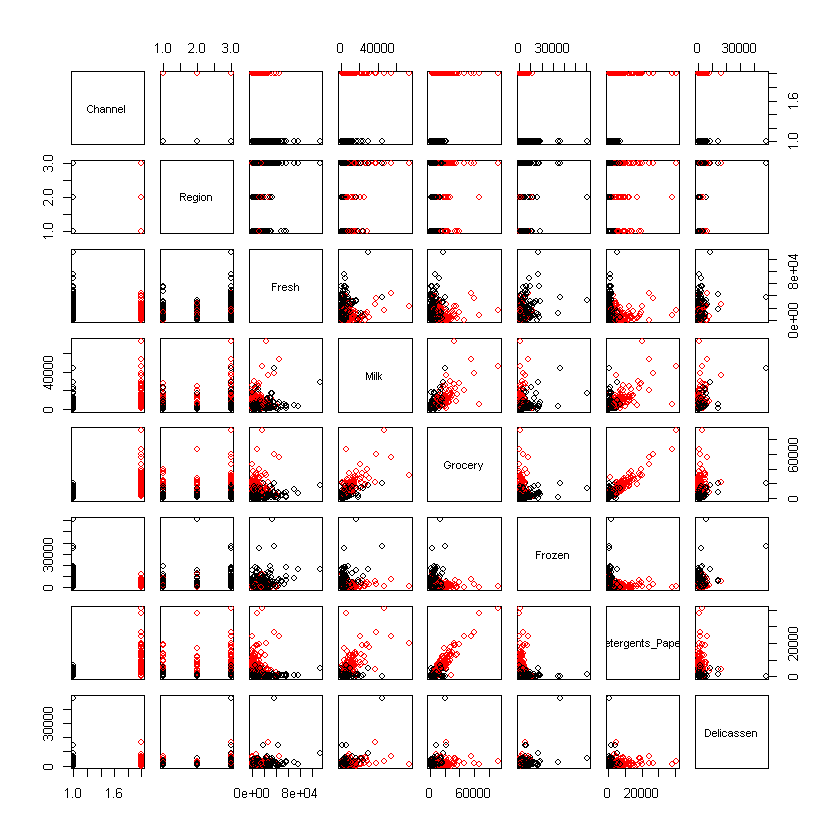

In [7]:
## Correlation
pairs(wholesale, col=wholesale$Channel)  # Correlation  - Scatter Plot
cor(wholesale)                           # Correlation score for the dataset
#Strong correlation is found in Grocery-Detergent:0.92, Milk-Detergent:0.66, Milk-Grocery:0.73

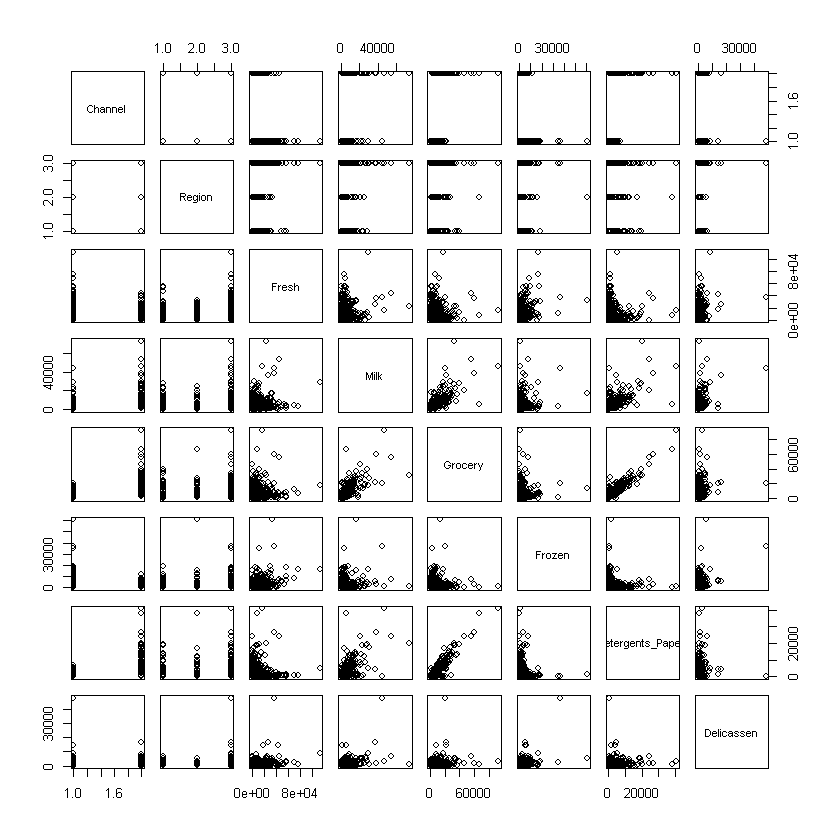

In [9]:
plot(wholesale)            # Scatter Plot fot Correlation
# We can roughly estimate 3 clusters

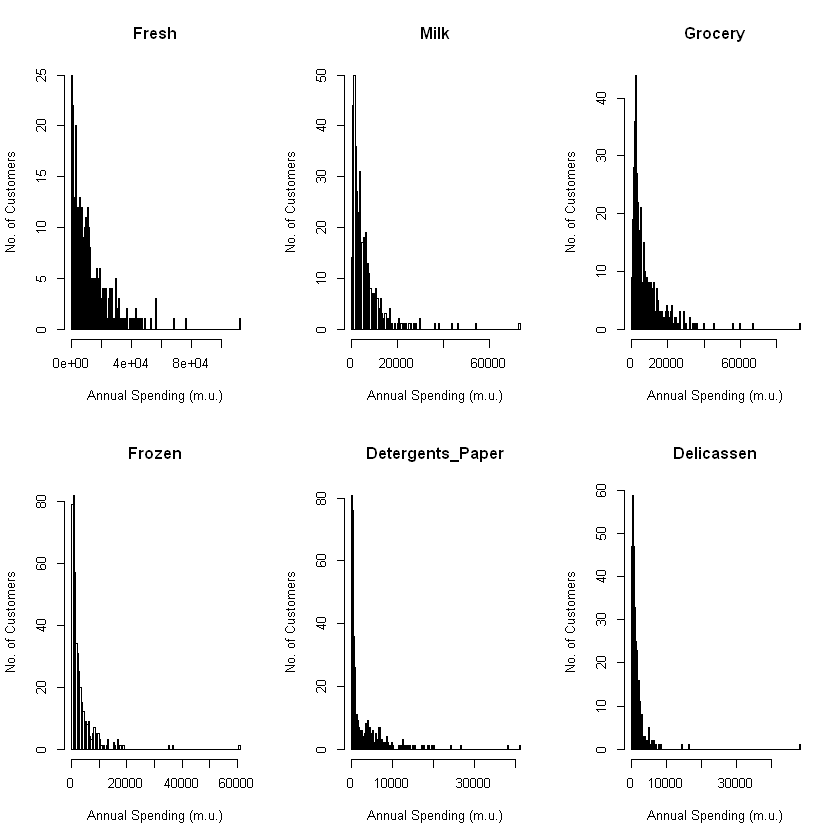

In [10]:
## Annual Spending vs Variables
par(mfrow=c(2,3))
for (i in c(3:8)){
  hist(wholesale[,c(i)], breaks = 200, 
       main = colnames(wholesale)[i], 
       xlab="Annual Spending (m.u.)", 
       ylab = "No. of Customers")
}
par(mfrow=c(1,1))
# The spending for Fresh products are far greater than those for other products, 
# indicating that Fresh product will dominate dissimilarity measures

# The spending distributions are positively skewed in all 6 product categories, 
# suggesting uevenly sized clusters
#####################################################################################

## (2) Data Cleaning

In [11]:
# Channel and Region have nominal values
# Channel and Region are not useful for clustering

summary(wholesale$Channel)  # Nominal variable (2 unique values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.323   2.000   2.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.543   3.000   3.000 

     Fresh             Milk          Grocery          Frozen       
 Min.   :     3   Min.   :   55   Min.   :    3   Min.   :   25.0  
 1st Qu.:  3128   1st Qu.: 1533   1st Qu.: 2153   1st Qu.:  742.2  
 Median :  8504   Median : 3627   Median : 4756   Median : 1526.0  
 Mean   : 12000   Mean   : 5796   Mean   : 7951   Mean   : 3071.9  
 3rd Qu.: 16934   3rd Qu.: 7190   3rd Qu.:10656   3rd Qu.: 3554.2  
 Max.   :112151   Max.   :73498   Max.   :92780   Max.   :60869.0  
 Detergents_Paper    Delicassen     
 Min.   :    3.0   Min.   :    3.0  
 1st Qu.:  256.8   1st Qu.:  408.2  
 Median :  816.5   Median :  965.5  
 Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :40827.0   Max.   :47943.0  

In [12]:
summary(wholesale$Region)   # Nominal variable (3 unique values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.543   3.000   3.000 

In [13]:
WS <- wholesale[,c(-1,-2)]  # subset without nominal variables
summary(WS)                 # data set with outliers

     Fresh             Milk          Grocery          Frozen       
 Min.   :     3   Min.   :   55   Min.   :    3   Min.   :   25.0  
 1st Qu.:  3128   1st Qu.: 1533   1st Qu.: 2153   1st Qu.:  742.2  
 Median :  8504   Median : 3627   Median : 4756   Median : 1526.0  
 Mean   : 12000   Mean   : 5796   Mean   : 7951   Mean   : 3071.9  
 3rd Qu.: 16934   3rd Qu.: 7190   3rd Qu.:10656   3rd Qu.: 3554.2  
 Max.   :112151   Max.   :73498   Max.   :92780   Max.   :60869.0  
 Detergents_Paper    Delicassen     
 Min.   :    3.0   Min.   :    3.0  
 1st Qu.:  256.8   1st Qu.:  408.2  
 Median :  816.5   Median :  965.5  
 Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :40827.0   Max.   :47943.0  

## (3) K means clustering without treating outliers

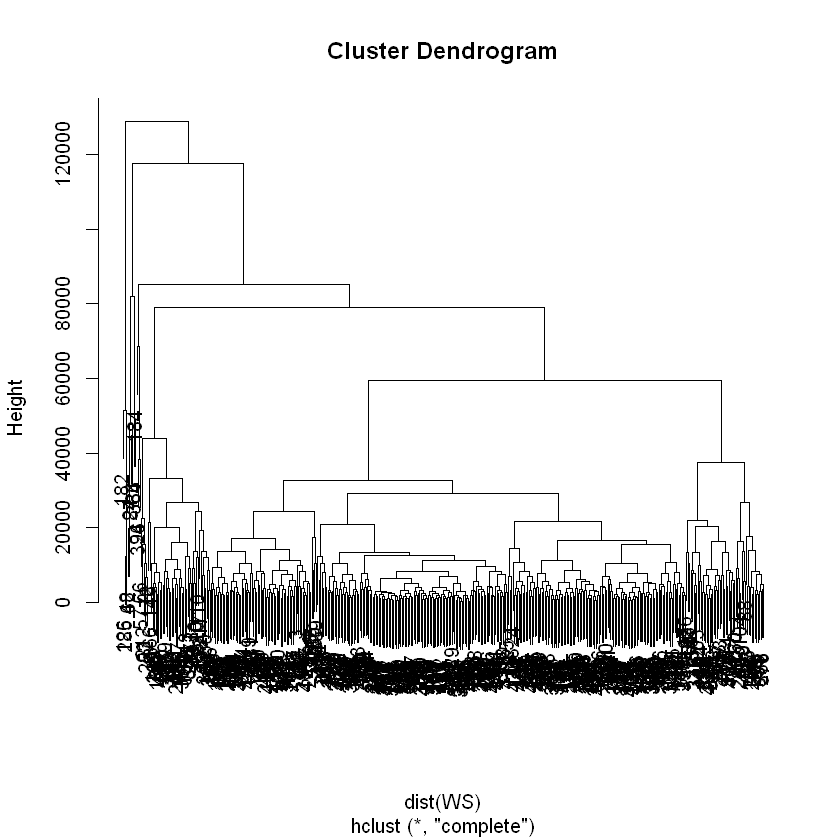

In [15]:
## hclust algorithm
plot(hclust(dist(WS)))        # "dendrogram" with 2 branches and 440 members total, at height 128968.4

K-means clustering with 5 clusters of sizes 227, 23, 105, 7, 78

Cluster means:
      Fresh      Milk   Grocery   Frozen Detergents_Paper Delicassen
1  6028.502  3359.026  4206.828 2435.841         1279.529   1004.771
2 49330.739  6823.261  6338.522 9666.087          950.913   4557.696
3 21341.486  3865.048  5118.190 4126.210         1125.505   1689.676
4 20031.286 38084.000 56126.143 2564.571        27644.571   2548.143
5  5076.654 12288.526 18814.526 1605.000         8254.397   1830.513

Clustering vector:
  [1] 1 1 1 1 3 1 1 1 1 5 5 1 3 3 3 1 5 1 3 1 3 1 3 5 3 3 1 3 5 2 3 1 3 3 1 1 3
 [38] 5 5 2 3 3 5 5 1 5 5 4 1 5 1 1 2 5 3 1 5 5 1 1 1 4 1 5 1 4 1 3 1 1 3 3 1 3
 [75] 1 3 1 5 1 1 1 5 1 3 1 4 4 2 1 3 1 1 5 3 5 1 1 1 1 1 5 5 1 2 3 3 1 5 1 5 1
[112] 5 3 3 3 1 1 1 3 1 3 1 1 1 3 2 3 3 1 2 1 1 3 1 1 1 1 1 1 1 3 3 2 1 3 5 1 1
[149] 1 3 3 1 3 1 1 5 5 3 1 5 1 1 3 5 1 5 1 1 1 1 5 5 1 5 1 5 2 1 1 1 1 2 5 2 1
[186] 1 1 1 5 5 3 1 1 5 1 3 3 1 1 1 5 5 3 1 1 5 1 1 1 5 3 4 1 1 1 5 5 3 5 1 3 1
[223] 

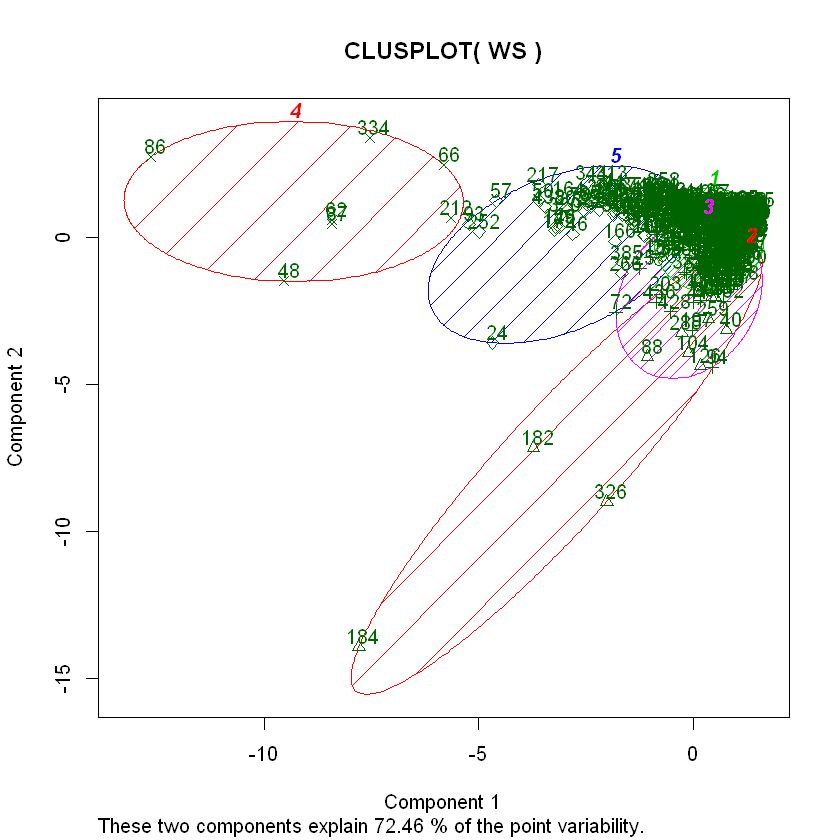

In [16]:
## K-means algorithm
cmodel1 <- kmeans(WS, centers=5, nstart=20)
cmodel1                       # create 5 clusters
library(cluster)
clusplot(WS, cmodel1$cluster, color = T, shade = T, labels = 2, lines = 0)

In [17]:
cmodel1$size    # size of each cluster formed

[1] 227  23 105   7  78

Medoids:
       ID Fresh  Milk Grocery Frozen Detergents_Paper Delicassen
 [1,] 280 17360  6200    9694   1293             3620       1721
 [2,] 198  2427  7097   10391   1127             4314       1468
 [3,]  27  9898   961    2861   3151              242        833
 [4,] 277 27901  3749    6964   4479              603       2503
 [5,] 251  3191  1993    1799   1730              234        710
 [6,] 302  5283 13316   20399   1809             8752        172
 [7,] 218 18044  1475    2046   2532              130       1158
 [8,] 252  6134 23133   33586   6746            18594       5121
 [9,] 240 47493  2567    3779   5243              828       2253
[10,]  48 44466 54259   55571   7782            24171       6465
Clustering vector:
  [1]  1  2  2  3  4  3  3  2  5  6  2  3  4  1  1  3  2  5  1  2  7  5  4  8  1
 [26]  1  3  7  6  9  1  5  7  4  5  2  4  1  6  9  4  7  1  6  2  6  6 10  1  8
 [51]  3  2  9  2  4  5  8  2  7  2  3 10  2  6  5  8  2  1  5  3  7  1  5  1  2
 [76]  7  5  6

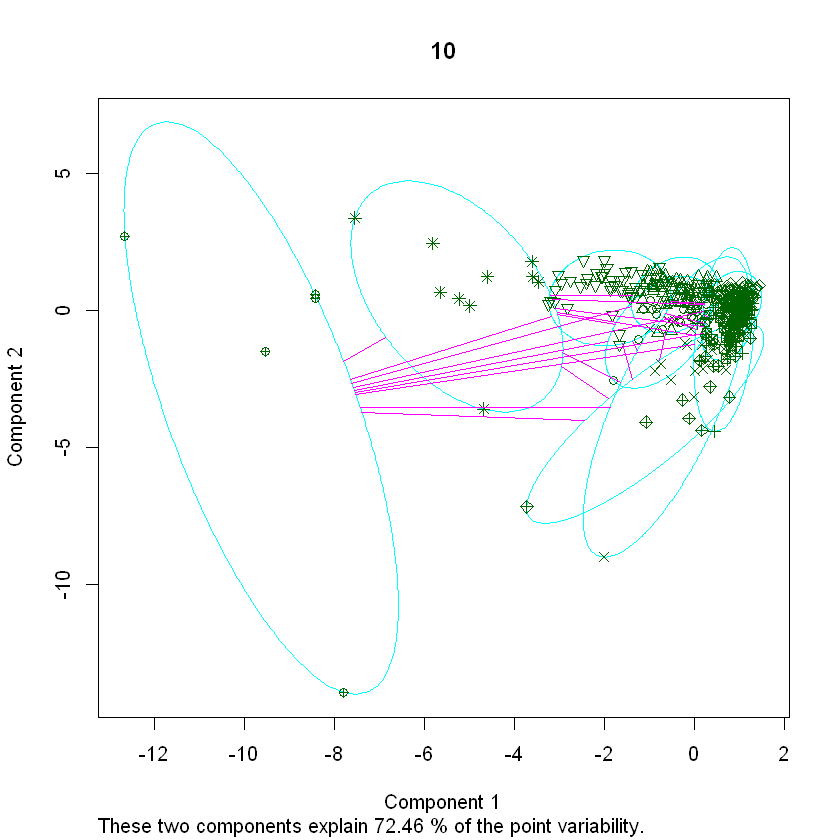

In [18]:
## PAM
pam.model1 <- pam(WS,10)
pam.model1
clusplot(pam.model1, 10)

## K means clustering with outliers treated

In [20]:
# If we go through the summary report, there's obviously a big difference for the top 
# customers in each category (e.g. Milk goes from a min of 55 to a max of 73498). 

# Doing a log transformation might help to deal such types of data.
# We could also remove those top customers completely from a business perspective

### Outlier detection from K-means algorithm
centers <- cmodel1$centers[cmodel1$cluster,]  # calculating distance between objects and cluster centres
distances <- sqrt(rowSums(WS-centers)^2)

 
outliers <- order(distances, decreasing=T)[1:5] # pick top 5 largest distances
print(outliers)                                 # list of outliers 
print(WS[outliers,])

WS2 <- WS[-outliers,]                           # Dataset without outliers

[1] 182 184  24  66 326
     Fresh  Milk Grocery Frozen Detergents_Paper Delicassen
182 112151 29627   18148  16745             4948       8550
184  36847 43950   20170  36534              239      47943
24   26373 36423   22019   5154             4337      16523
66      85 20959   45828     36            24231       1423
326  32717 16784   13626  60869             1272       5609


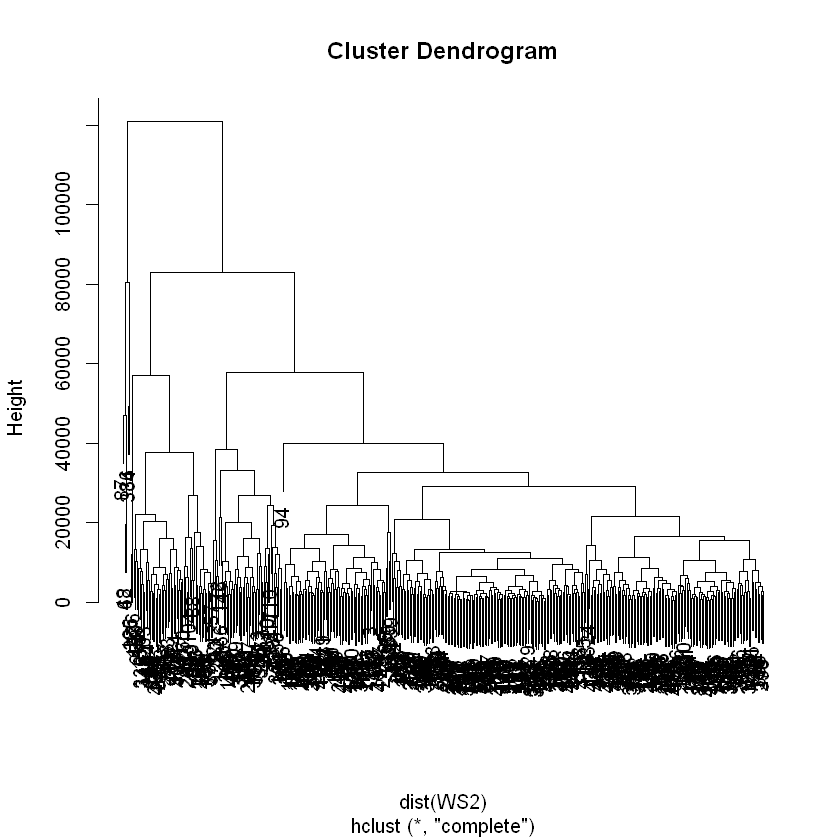

In [21]:
## hclust algorithm
plot(hclust(dist(WS2)))            # "dendrogram" with 2 branches and 435 members total, at height 128968.4    

K-means clustering with 5 clusters of sizes 224, 22, 6, 103, 80

Cluster means:
      Fresh      Milk   Grocery   Frozen Detergents_Paper Delicassen
1  6072.049  3292.946  4122.933 2451.991        1224.5000   996.6429
2 46518.000  3438.682  4785.091 5249.955         801.0455  2147.2273
3 23355.667 40938.167 57842.500 2986.000       28213.5000  2735.6667
4 21071.379  3851.971  5106.602 4135.194        1125.8932  1678.6602
5  4724.212 11837.013 18461.588 1546.575        8195.8875  1638.6500

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   4   1   1   1   1   5   5   1   4   4   4   1   5   1   4   1 
 21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41 
  4   1   4   4   4   1   4   5   2   4   1   4   4   1   1   4   5   5   2   4 
 42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61 
  4   5   5   1   5   5   3   1   5   1   1   2   5   4   1   5   5   1   1   1 


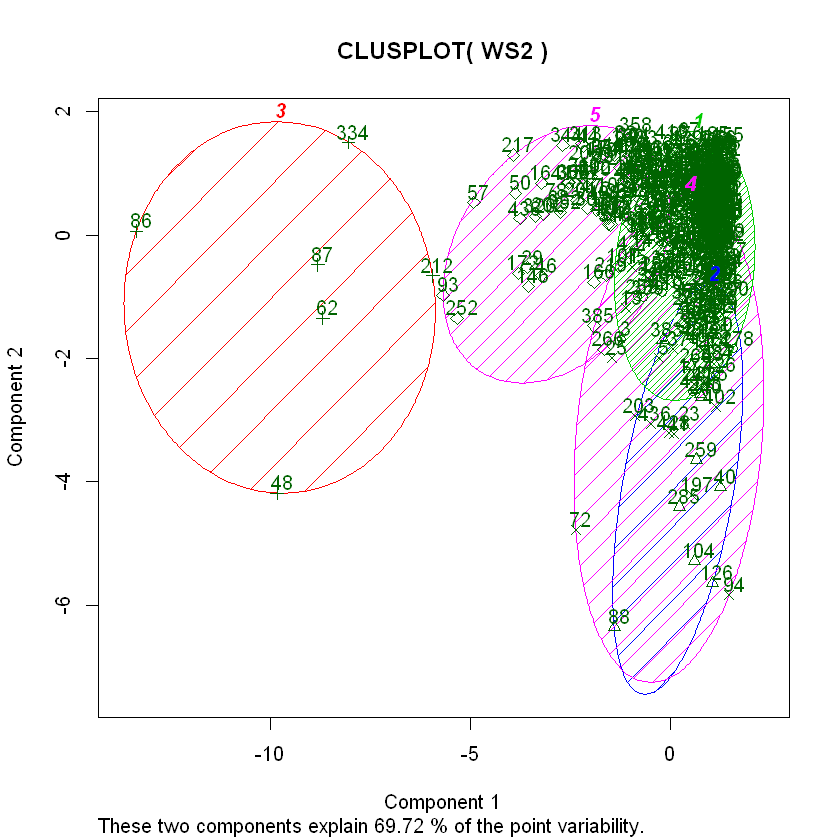

In [22]:
## K-means algorithm
cmodel2 <- kmeans(WS2, centers=5, nstart=20)
cmodel2                            # create 5 clusters without outliers

clusplot(WS2, cmodel2$cluster, color = T, shade = T, labels = 2, lines = 0)
#####################################################################################

## (4) Elbow Curve

package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\saikiran\AppData\Local\Temp\Rtmpio6LCo\downloaded_packages


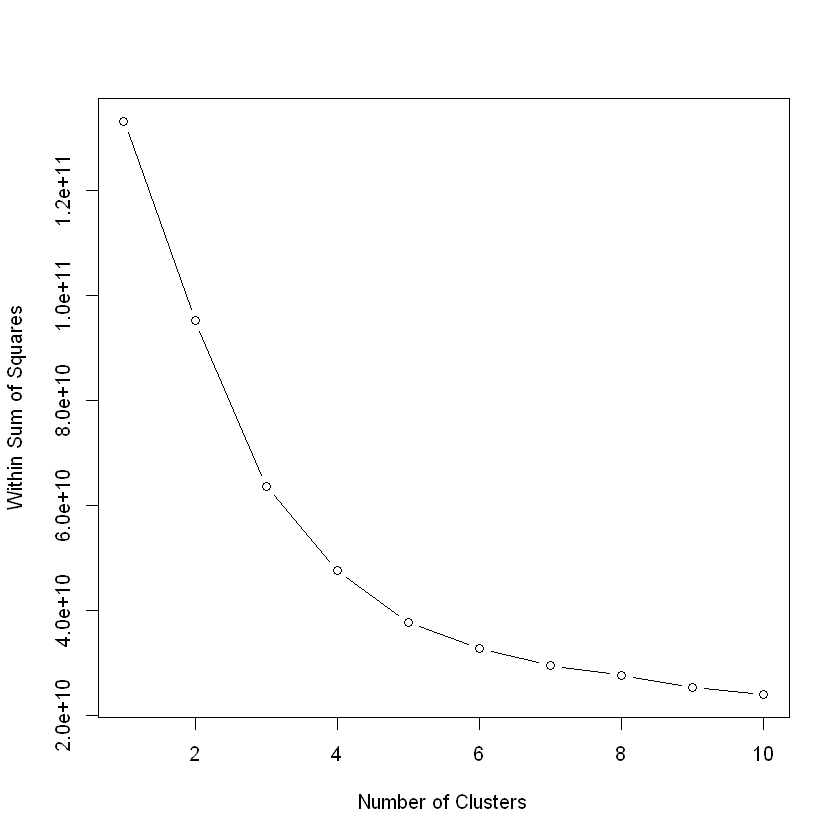

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


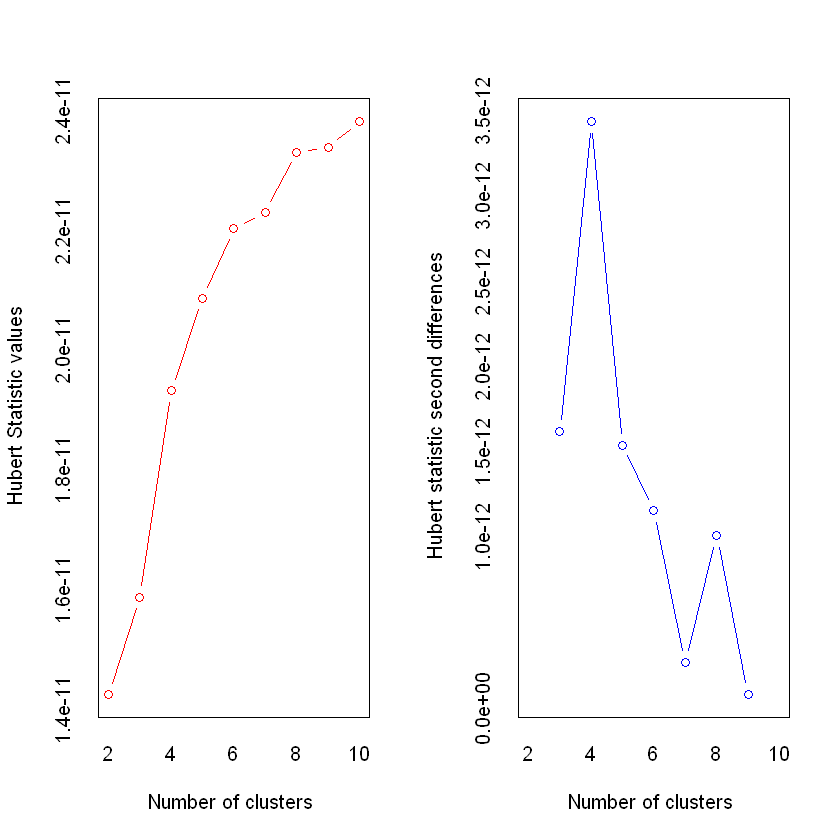

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 2 proposed 2 as the best number of clusters 
* 11 proposed 3 as the best number of clusters 
* 3 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 2 proposed 10 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


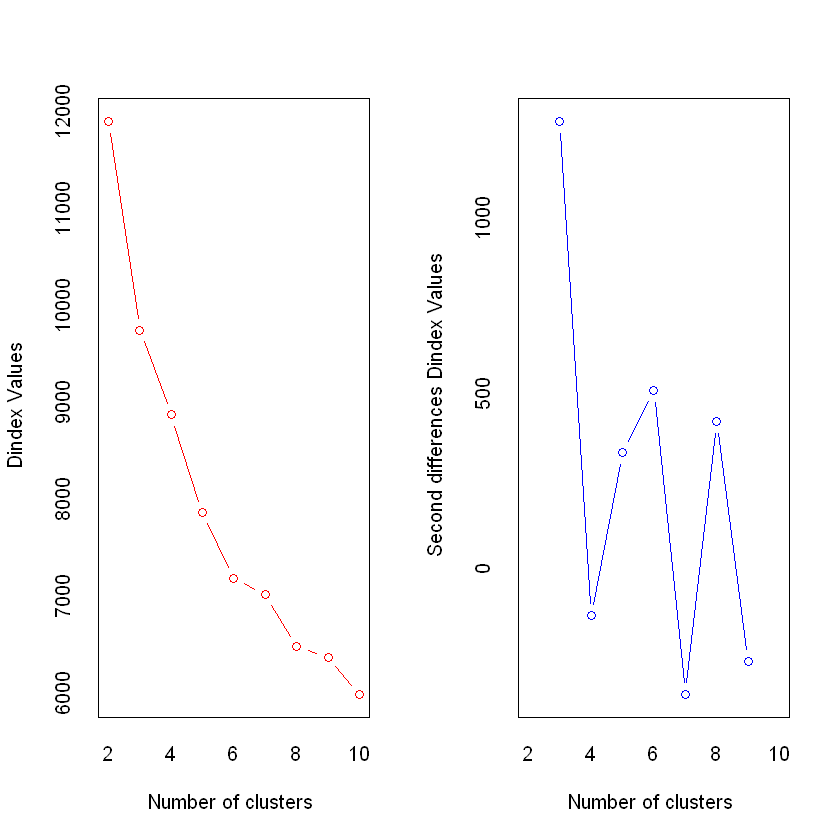

In [23]:
wss=(nrow(WS2)-1)*sum(apply(WS2,2,var))
for(i in 2:10){
  wss[i]=sum(kmeans(WS2,centers=i,nstart=5)$withinss)
}

plot(1:10,wss,xlab="Number of Clusters",ylab="Within Sum of Squares",type="b")

# in order to findout the optimal number of clusters
#install.packages("NbClust")
library(NbClust)

nClust=NbClust(WS2, distance="euclidean",method="kmeans",min.nc=2,max.nc=10)
par(mfrow=c(1,1))
#   According to the majority rule, the best number of clusters is  3 

## (5) Optimal Value

K-means clustering with 3 clusters of sizes 51, 77, 307

Cluster means:
      Fresh      Milk   Grocery   Frozen Detergents_Paper Delicassen
1  7537.196 17487.745 26767.882 1946.471        12019.412   1919.569
2 31047.494  4284.494  5416.325 4655.649         1049.091   1887.883
3  7481.772  3846.362  5200.495 2522.987         1755.896   1132.345

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  3   3   3   3   2   3   3   3   3   1   3   3   2   2   2   3   3   3   3   3 
 21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41 
  3   3   2   2   3   3   3   1   2   3   3   2   2   3   3   2   3   1   2   2 
 42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61 
  3   3   1   3   1   1   1   3   1   3   3   2   3   2   3   1   3   3   3   3 
 62  63  64  65  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 
  1   3   1   3   3   2   3   3   3   3   3   2   3   2   3   1  

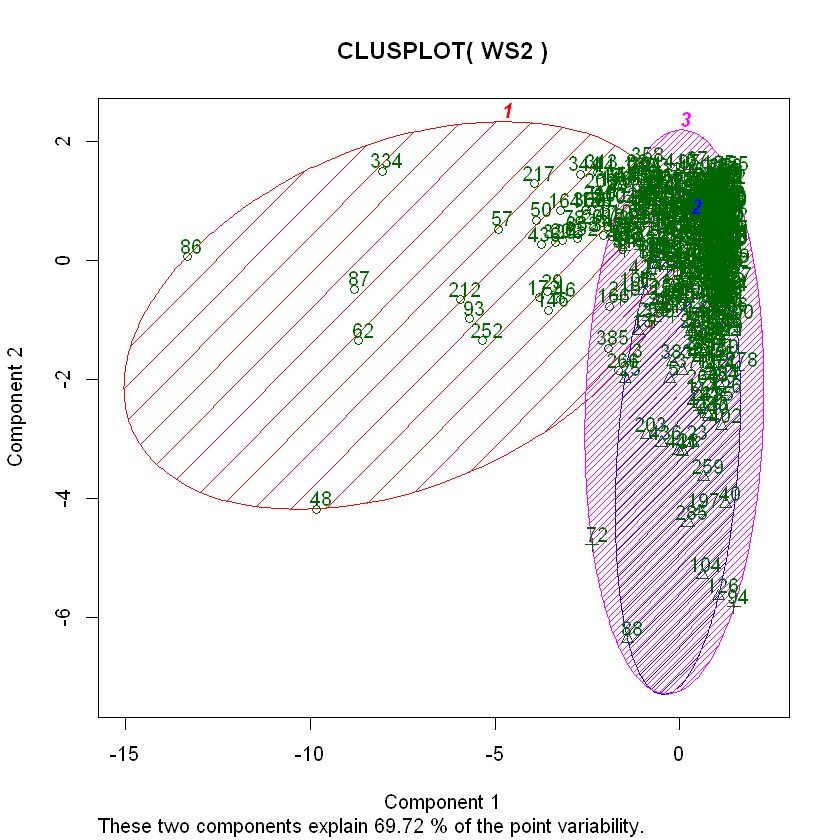

In [25]:
# K-means with optimal value of k=3

fit <- kmeans(WS2 , centers=3, nstart=20)
fit

clusplot(WS2, fit$cluster, color = T, shade = T, labels = 2, lines = 0)

In [26]:
fit$size
# Thus, the first cluster has 307 customers, 
# second cluster has 77 customers and 
# third cluster has 51 customers

interpret <- data.frame(fit$centers)
# Fresh       Milk      Grocery   Frozen    Detergents_Paper  Delicassen
# 7481.772    3846.362  5200.495  2522.987  1755.896          1132.345 # cluster of customers who spends less on all products
# 31047.494   4284.494  5416.325  4655.649  1049.091          1887.883 # cluster of customers who spends more on fresh/frozen products 
# 7301.235    17343.294 26888.157 1854.314  12113.941         1891.196 # cluster of customer who spends more on groceries/milk products

library(dplyr)
interpret <- mutate(interpret,apply(interpret,1,sum))
interpret


[1]  51  77 307

Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,"apply(interpret, 1, sum)"
7537.196,17487.745,26767.882,1946.471,12019.412,1919.569,67678.27
31047.494,4284.494,5416.325,4655.649,1049.091,1887.883,48340.94
7481.772,3846.362,5200.495,2522.987,1755.896,1132.345,21939.86


In [27]:
# We can infer from the summation of the means of each clusters that the clusters have been divided as per
# the total monetary units spent by each client of the wholesale distributors. The clusters have been divided
# into 3 clusters as per spend between 10000-30000, 30001-50000, 60000+.

# less Spending in cluster1 is on all products
# High spending in cluster2 is on Fresh, Grocery and Milk
# High spending in cluster3 is on Grocery, Milk and Detergent_Papers

# These results are illustrative in determining that raw ingredients like fresh/frozen foods and deli products 
# tend to be purchased in large amounts by similar customers, whereas retail products like groceries, milk and 
# detergents/paper are linked to another group of customers. 
# Another group of customers tends to spend less overall on all products.
#####################################################################################